1 0.0 1.5 3.0 1.5
2 0.0 0.75 1.5 -3.375
3 0.75 1.125 1.5 -1.21875
4 1.125 1.3125 1.5 0.0703125
5 1.125 1.21875 1.3125 -0.591796875
6 1.21875 1.265625 1.3125 -0.26513671875
7 1.265625 1.2890625 1.3125 -0.0985107421875
8 1.2890625 1.30078125 1.3125 -0.014373779296875
9 1.30078125 1.306640625 1.3125 0.02790069580078125
10 1.30078125 1.3037109375 1.306640625 0.0067462921142578125
11 1.30078125 1.30224609375 1.3037109375 -0.003818035125732422
12 1.30224609375 1.302978515625 1.3037109375 0.0014630556106567383
13 1.30224609375 1.3026123046875 1.302978515625 -0.001177757978439331
14 1.3026123046875 1.30279541015625 1.302978515625 0.0001425817608833313
15 1.3026123046875 1.302703857421875 1.30279541015625 -0.000517604872584343
16 1.302703857421875 1.3027496337890625 1.30279541015625 -0.0001875157468020916
17 1.3027496337890625 1.3027725219726562 1.30279541015625 -2.2468040697276592e-05

The root is approximately at x = 1.3027725219726562 and at this approximation, f(x) = -2.2468040697276592e-05

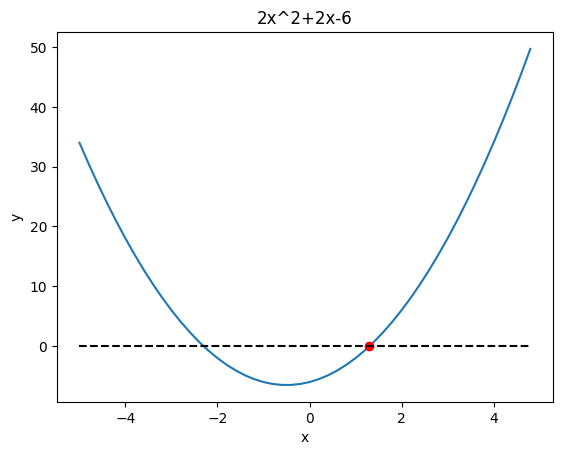

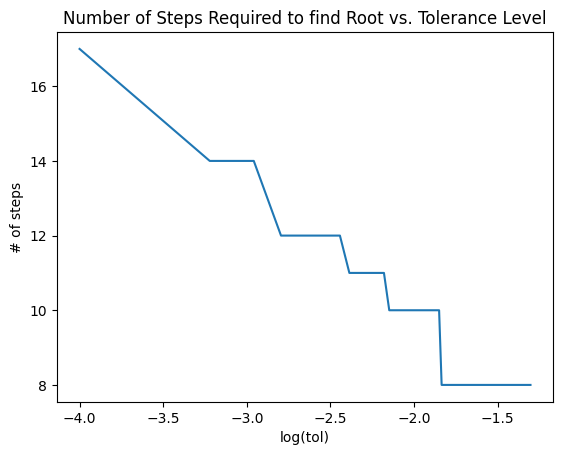

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

#function that creates parabola
def parabola(x):
    result = a*(x**2) + b*x + c #ax^2 + bx + c
    return result

#coefficients of parabola
a = 2.0
b = 2.0
c = -6.0

#initial tolerance value (iterative procedure stops when tolerance condition is met)
tol = 0.0001


#variable to count the number of steps of the bisection procedure
nsteps = 0

#user input for x1 and x3, and calculation of x2 afterwards 
x1 = float(input("Input value for x1:"))
while parabola(x1)>0:
    print("Re-enter x1, make sure f(x1) < 0")
x3 = float(input("Input value for x3:"))
while parabola(x3)<0:
    print("Re-enter x3, make sure f(x3) > 0")
x2 = (x1 + x3)/2.0

#while loop calculates root using tolerance value of 0.0001
while math.fabs(parabola(x2)) > tol: #while the magnitude of f(x) > 0.0001, the loop keeps going
    
    if parabola(x2) < 0: #condition to update the interval (x1,x3)
          x1 = x2
    else:
        x3 = x2
    x2 = (x1 + x3)/2.0 #calculating the new x2
    nsteps += 1 #incrementing nsteps
    print(nsteps, x1, x2, x3, parabola(x2)) #printing nsteps, x1, x2, x3, and f(x2) for each step to error check

#prints the final values of x2, f(x2), and number of steps required to reach this calculation
print("\nThe root is approximately at x =", x2, "and at this approximation, f(x) =", parabola(x2),
      "≈0\nThis calculation required this many iterations to determine:", nsteps, "\n")

#plots quadratic
x = np.arange(-5,5, 0.2) #makes array of x values from -5 to 5, each value is incremented by 0.2
y = parabola(x) #makes array of y values for f(x) from array made above
plt.figure()
plt.plot(x,y) #graphs parabola
plt.plot(x2, parabola(x2), 'ro') #puts marker at root
plt.plot(x, 0.0*x, 'k--') #makes center line at 0
plt.title('2x^2+2x-6') #title/labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#creating empty lists
tolList=[]
stepList=[]

#while loop runs multiple iterations of what was done above to determine the relationship between tolerance and # of steps required
while tol<0.05: 
    nsteps = 0 #resets steps every iteration
    x1 = 0 #resets x1, x3 and x2 every iteration
    x3 = 6
    x2 = (x1 + x3)/2.0
    while math.fabs(parabola(x2)) > tol:
    
        if parabola(x2) < 0: #condition to update the interval (x1,x3)
              x1 = x2
        else:
            x3 = x2
        x2 = (x1 + x3)/2.0
        nsteps += 1    
    stepList.append(nsteps) #adds number of steps and what the tolerance was for each iteration
    tolList.append(tol) #adds the current tolerance to the tolerance list
    tol = tol + 0.0005 #increases tolerance slightly every round

print('\n')

#plots logarithmic graph
x = np.log10(tolList) #makes an array by taking the log base 10 values for each value in the tolerance list
y = stepList #sets y to the number of steps list
plt.figure()
plt.plot(x,y)
plt.xlabel('log(tol)')
plt.ylabel('# of steps')
plt.title('Number of Steps Required to find Root vs. Tolerance Level')
plt.show()